<a href="https://colab.research.google.com/github/ayydannm/MachineLearning/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC #Support vector machines

iris=load_iris(as_frame=True)
X=iris.data[["petal length (cm)","petal width (cm)"]].values
y=(iris.target==2) # Iris virginica

svm_clf=make_pipeline(StandardScaler(),
                      LinearSVC(C=1,random_state=42))

svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [ ]:
X_new=[[5.5,1.7],[5.0,1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [ ]:
svm_clf.decision_function(X_new)

array([ 0.66163816, -0.22035761])

#Nonlinear svm classification

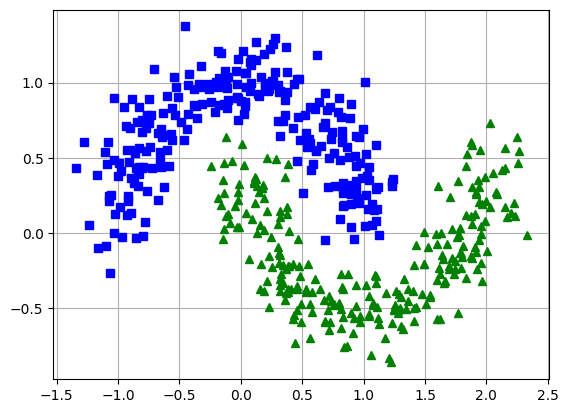

In [ ]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

X,y=make_moons(n_samples=500,noise=0.15,random_state=42)

plt.plot(X[:,0][y==0],X[:,1][y==0],"bs")
plt.plot(X[:,0][y==1],X[:,1][y==1],"g^")
plt.grid()


In [ ]:
svm_clf.fit(X,y)
svm_clf.score(X,y)

0.866

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

svm_clf=make_pipeline(PolynomialFeatures(degree=3),
                      StandardScaler(),
                      LinearSVC(C=10,max_iter=10_000,random_state=42))

svm_clf.fit(X,y)
svm_clf.score(X,y)

1.0

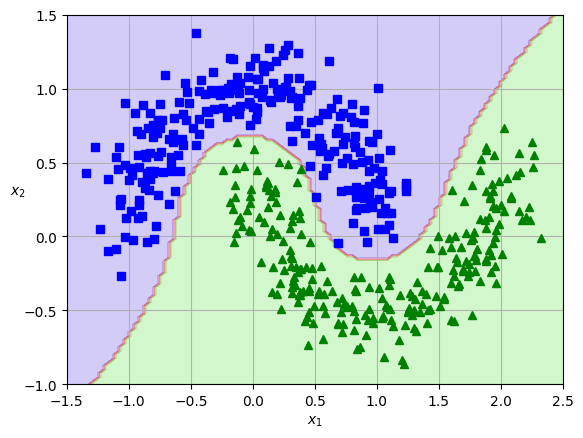

In [ ]:
def plot_dataset(X,y,axes):
  plt.plot(X[:,0][y==0],X[:,1][y==0],"bs")
  plt.plot(X[:,0][y==1],X[:,1][y==1],"g^")
  plt.axis(axes)
  plt.grid(True)
  plt.xlabel("$x_1$")
  plt.ylabel("$x_2$",rotation=0)
  plt.show()

def plot_predictions(clf,axes=[-1.5,2.5,-1,1.5]):
  x0s=np.linspace(axes[0],axes[1],100)
  x1s=np.linspace(axes[2],axes[3],100)
  x0,x1=np.meshgrid(x0s,x1s)
  X=np.c_[x0.ravel(),x1.ravel()]
  y_pred=clf.predict(X).reshape(x0.shape)
  plt.contourf(x0,x1,y_pred,cmap=plt.cm.brg,alpha=0.2)

plot_predictions(svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])

In [ ]:
from sklearn.svm import SVC

poly_kernel_svm_clf=make_pipeline(StandardScaler(),
                                  SVC(kernel="poly",coef0=1,degree=3,C=10))

poly_kernel_svm_clf.fit(X,y)
poly_kernel_svm_clf.score(X,y)

0.998

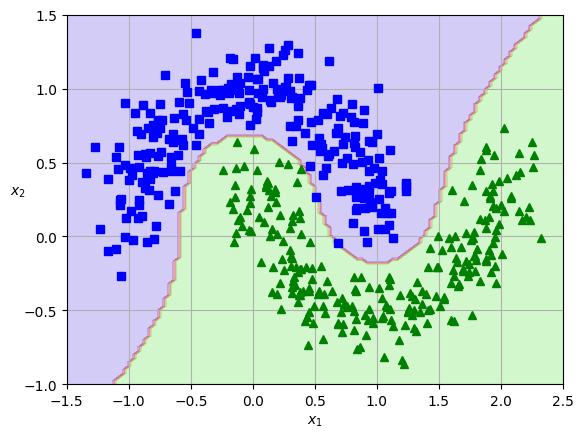

In [ ]:
plot_predictions(poly_kernel_svm_clf,[-1.5,2.5,-1,1.5])
plot_dataset(X,y,[-1.5,2.5,-1,1.5])

In [ ]:
rbf_kernel_svm_clf=make_pipeline(StandardScaler(),
                                 SVC(kernel="rbf",gamma=5,C=0.001))

rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

In [ ]:
rbf_kernel_svm_clf.score(X,y)

0.992

In [ ]:
# 1)Izah onemlidirse sade model ,dataya cox vaxt gedirki score artsin
# 2)SVM-data orta 30min fAlan classifaciton meselelerinde daha cox ,(bir cox model yoxla bax)

SVR

In [ ]:
from sklearn.svm import SVR,LinearSVR
from sklearn.model_selection import train_test_split

np.random.seed(42)
X=2*np.random.rand(500,1)
y=4+3**X[:,0]+np.random.randn(500)

X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

svm_reg=make_pipeline(StandardScaler(),
                     SVR(kernel="poly",degree=3))

svm_reg.fit(X_train,y_train)
svm_reg.score(X_test,y_test)

0.6252747043070841

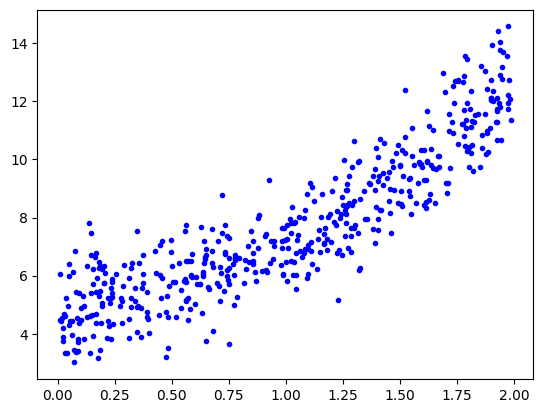

In [ ]:
plt.plot(X,y,"b.");

In [ ]:
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd_clas=make_pipeline(StandardScaler(),
                        SGDClassifier())
sgd_clas.fit(X,y)
sgd_clas.score(X,y)

1.0

In [ ]:
from sklearn.datasets import load_wine

wine = load_wine(as_frame=True)

In [ ]:
X = wine.data.values
y = wine.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
load_wine_svc=make_pipeline(StandardScaler(),
                       SVC(kernel="poly",coef0=1,degree=3,C=10))

load_wine_svc.fit(X_train,y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=10, coef0=1, kernel='poly'))])

In [ ]:
load_wine_svc.score(X_train,y_train)

1.0

In [ ]:
load_wine_svc.score(X_test,y_test)

0.9722222222222222

In [ ]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
X = housing.data
y = housing.target


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.svm import LinearSVR

linear_svr = make_pipeline(
    StandardScaler(),
    LinearSVR(max_iter=10000)
)
linear_svr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(max_iter=10000))])

In [ ]:
linear_svr.score(X_train, y_train)

0.3156612049358408

In [ ]:
linear_svr.score(X_test, y_test)

0.5925399965496825

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'linearsvr__max_iter':[10000],
    'linearsvr__C':[10, 50, 100],
    'linearsvr__epsilon':[1, 10, 30]
}

grid_serch = GridSearchCV(linear_svr, param_grid, cv=3)
grid_serch.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  w

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('linearsvr',
                                        LinearSVR(max_iter=10000))]),
             param_grid={'linearsvr__C': [10, 50, 100],
                         'linearsvr__epsilon': [1, 10, 30],
                         'linearsvr__max_iter': [10000]})

In [ ]:
grid_serch.best_estimator_.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(C=10, epsilon=1, max_iter=10000))])

In [ ]:
grid_serch.score(X_train, y_train)

0.5776556284088681

In [ ]:
grid_serch.score(X_test, y_test)

0.5653738745114594

In [ ]:
from sklearn.svm import SVR

rbf_svr = make_pipeline(
    StandardScaler(),
    SVR(kernel="rbf",C=100,epsilon=0.1,gamma=0.1)
)
rbf_svr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(C=100, gamma=0.1))])

In [ ]:
rbf_svr.score(X_train, y_train)

0.7913147461211683

In [ ]:
rbf_svr.score(X_test, y_test)

0.7461519126694376